# Insurance:

In [37]:
import pandas as pd

In [38]:
a=pd.read_csv('/home/govardhan/Downloads/insurance2.csv')
a.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [39]:
a.shape

(1338, 8)

In [40]:
a.isnull().any()

age               False
sex               False
bmi               False
children          False
smoker            False
region            False
charges           False
insuranceclaim    False
dtype: bool

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
a.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [43]:
a.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


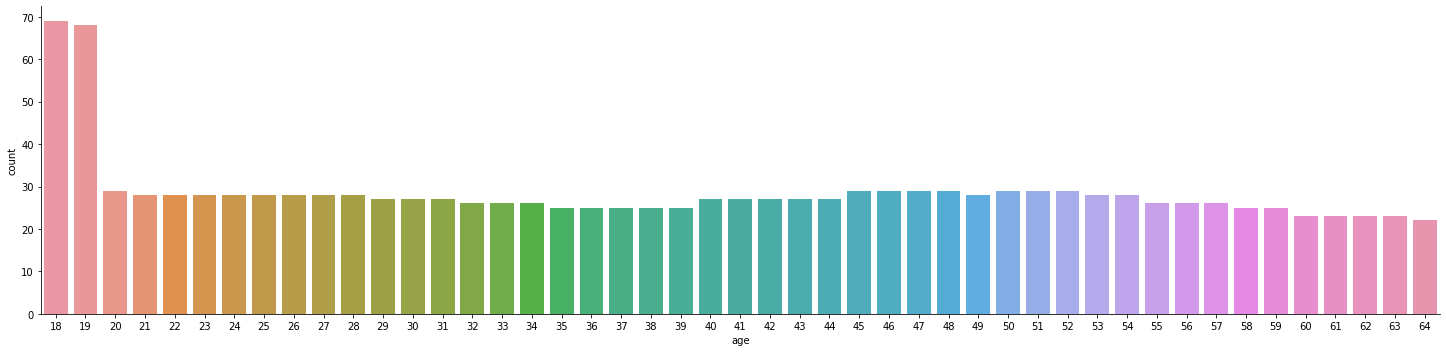

In [44]:
sns.catplot(x='age',data=a,kind='count',aspect=2*2)

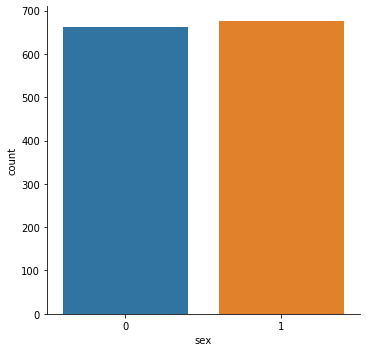

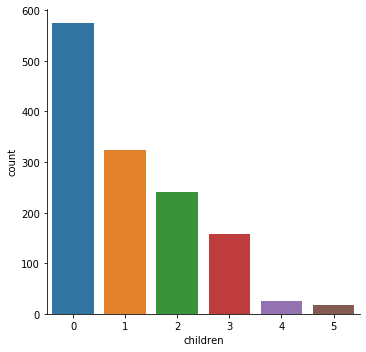

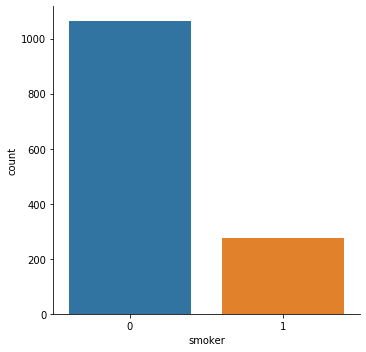

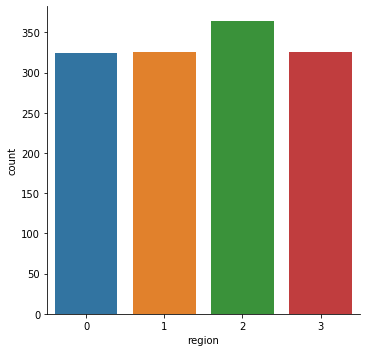

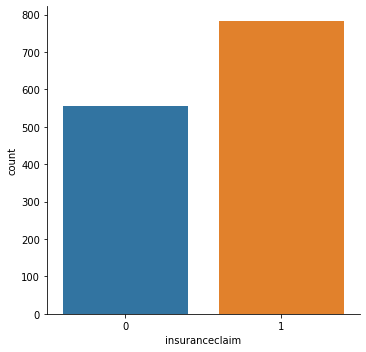

In [45]:
for i in a:
    if i != 'bmi' and i != 'charges' and i != 'age':
        sns.catplot(x=i,data=a,kind='count')


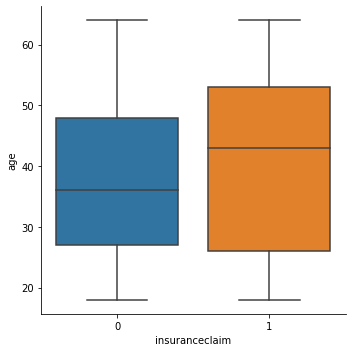

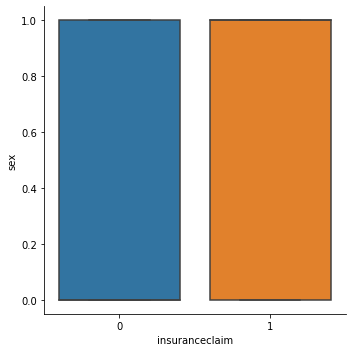

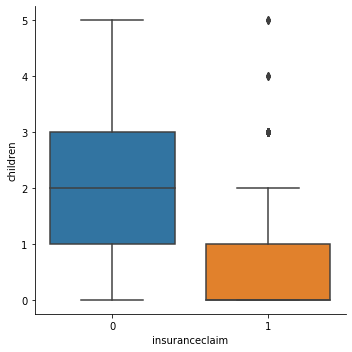

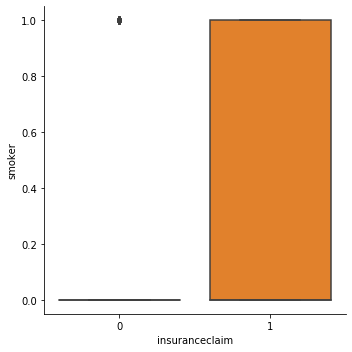

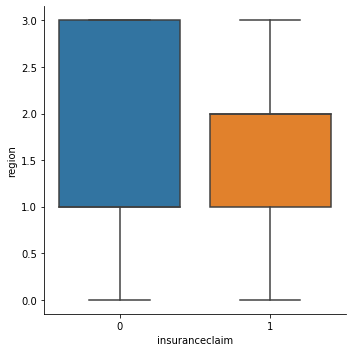

In [46]:
for i in a:
    if i != 'bmi' and i != 'charges' and i != 'insuranceclaim':
        sns.catplot(y=i,x='insuranceclaim',data=a,kind='box')
        

In [47]:
a.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [48]:
b=a.drop(['age','sex','children','smoker','region'],axis=1)
b.head()

,bmi,charges,insuranceclaim
0,27.900,16884.92400,1
1,33.770,1725.55230,1
2,33.000,4449.46200,0
3,22.705,21984.47061,0
4,28.880,3866.85520,1


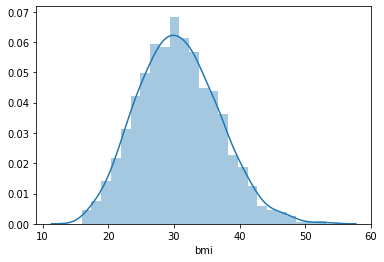

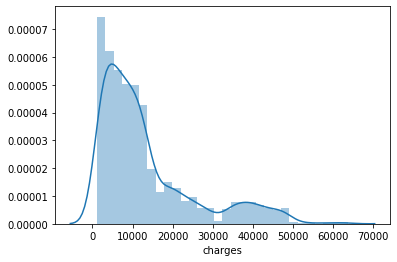

In [49]:
for i in b:
    if i != 'insuranceclaim':
        
        sns.distplot(b[i])
        plt.show()

In [50]:
#corelation:
a_cor=a.corr()
a_cor

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


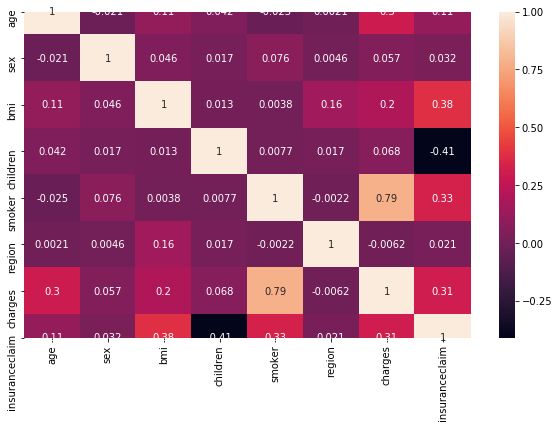

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(a_cor,annot=True)

In [52]:
#model:

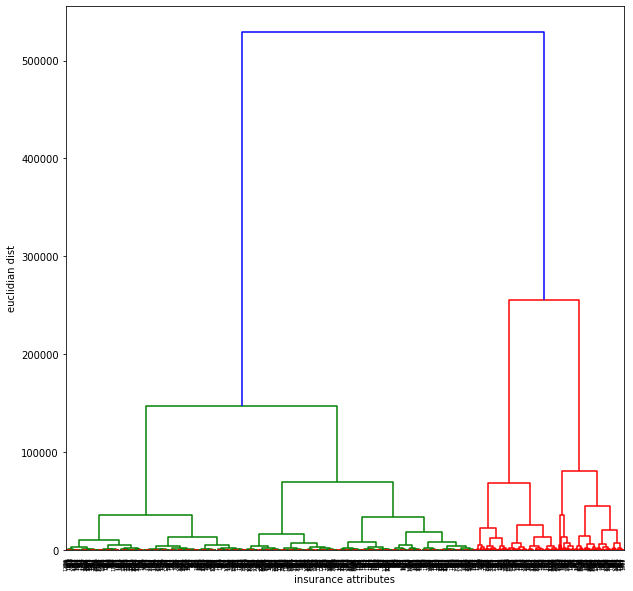

In [64]:
#optimal cluster:
from scipy.cluster import hierarchy
plt.figure(figsize=(10,10))
dendogram=hierarchy.dendrogram(hierarchy.linkage(a,method='ward'))
plt.axhline(y=.17,color='r',linestyle='--')
plt.ylabel('euclidian dist')
plt.xlabel('insurance attributes')
plt.show()

In [65]:
from sklearn.cluster import AgglomerativeClustering

In [66]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [67]:
pred_hc=hc.fit_predict(a)

In [73]:
cluster=pd.DataFrame(pred_hc)
cluster.columns=["cluster"]
h=pd.concat([a,cluster],axis=1)
h.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim,cluster
0,19,0,27.900,0,1,3,16884.92400,1,0
1,18,1,33.770,1,0,2,1725.55230,1,1
2,28,1,33.000,3,0,2,4449.46200,0,1
3,33,1,22.705,0,0,1,21984.47061,0,0
4,32,1,28.880,0,0,1,3866.85520,1,1


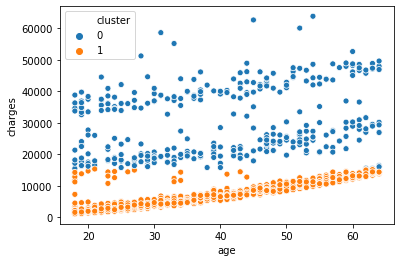

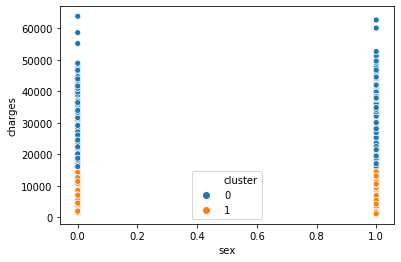

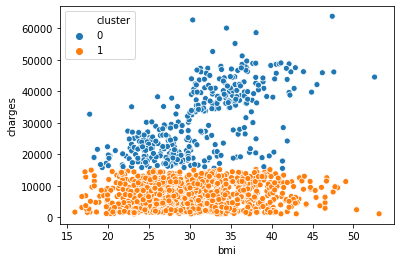

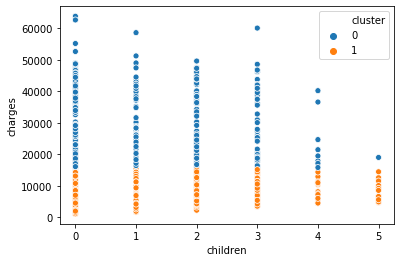

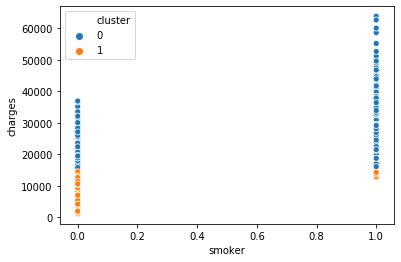

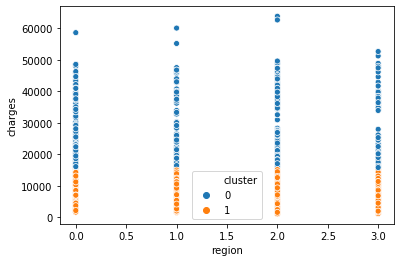

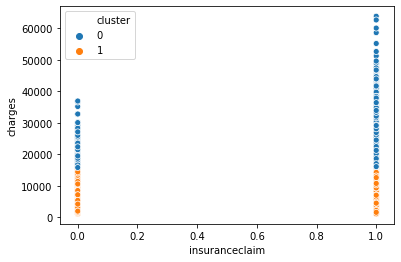

In [78]:
for i in h:
    if i != 'cluster' and i != 'charges':
        sns.scatterplot(x=i,y='charges',data=h,hue='cluster')
        plt.show()